In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Load the Dataset from sklearn
---


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [11]:
## dump it locally for future usage
with open("mnist_new","wb") as f:
    pickle.dump(mnist,f)

In [3]:
with open("mnist_new","rb") as f:
    mnist = pickle.load(f)

In [4]:
X, y = mnist["data"].to_numpy(dtype=float), mnist["target"].to_numpy(dtype=int)

### Plot Digits 

Text(0.5, 0.98, 'MNIST Dataset Sample')

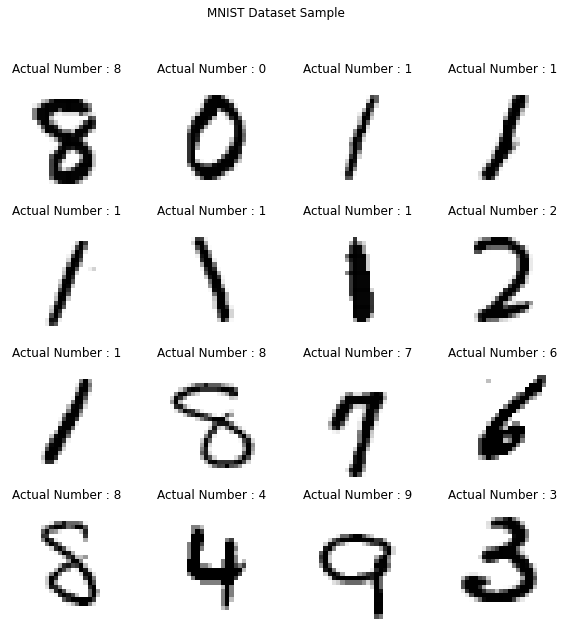

In [17]:
import matplotlib.pyplot as plt

index = 10
fig,ax = plt.subplots(4,4,figsize=(10,10))
for i in range(4):
    for j in range(4):
        index = np.random.randint(0,X.shape[0])
        ax[i][j].imshow(X[index].reshape(28,28),cmap="binary")
        ax[i][j].set_title("Actual Number : " + str(y[index]) )
        ax[i][j].set_axis_off()
fig.suptitle("MNIST Dataset Sample")

### Test Train Split

In [19]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)

### Pick a number for Classification

Here we will pick the number 7 for classification

In [20]:
NUMBER = 4 
y_train_4 = (y_tr == 4).copy()
y_test_4 = (y_ts == 4).copy()

# Whereever the values are 7, make it 1 and where ever the values are not 7, make it zero



Text(0.5, 1.0, 'Data-split Positive and Negative classes')

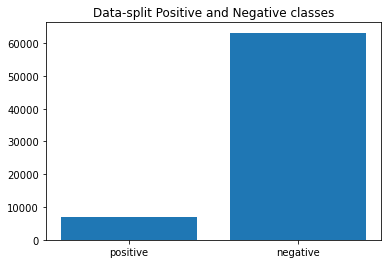

In [15]:
import matplotlib.pyplot as plt

classSize = np.where(y == 4)[0].shape[0]
totalSize = (y != 7).shape[0]

plt.bar(["positive","negative"], [classSize,totalSize-classSize])
plt.title("Data-split Positive and Negative classes")

In [14]:
np.where(y == 4)[0].shape[0]

(6824,)

#### Model for Classification

Here we pick the "Support vector classification" model for classifying our dataset

In [24]:
from sklearn.linear_model import SGDClassifier

svcModel =  SGDClassifier(random_state=42,n_jobs=-1)
svcModel.fit(X_tr, y_train_4)

SGDClassifier(n_jobs=-1, random_state=42)

In [25]:
from sklearn.model_selection import cross_val_score
accArray = cross_val_score(svcModel, X_tr, y_train_4, cv=3, scoring="accuracy")

Text(0.5, 1.0, 'Accuracy of model')

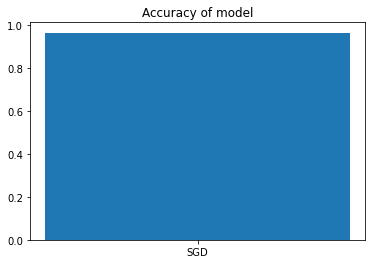

In [35]:
### PLotting accuracy 
plt.bar(["SGD"],[np.mean(accArray)])
plt.title("Accuracy of model")

In [39]:
[np.mean(accArray)]

[0.9647833333333334]

#### Never  4 classifier

In [36]:
from sklearn.base import BaseEstimator
class Never4Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
never_4_clf = Never4Classifier()
never4 = cross_val_score(never_4_clf, X_tr, y_train_4, cv=3, scoring="accuracy")

Text(0.5, 1.0, 'Accuracy comparision')

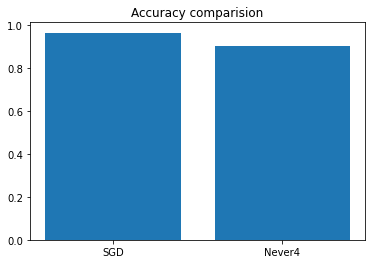

In [38]:
plt.bar(["SGD","Never4"],[np.mean(accArray),np.mean(never4)])
plt.title("Accuracy comparision")

In [40]:
np.mean(never4)

0.9013666666666668

#### Prediction 


In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svcModel, X_tr, y_train_4, cv=3)

### Confusion Matrix

Lets plot the confusion matrix for the given classificaiton

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_4, y_train_pred)

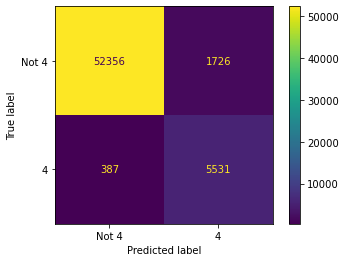

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not 4","4"])
disp.plot()

plt.show()

### Precision Recall Curve

the P-R curve can be plotted by obtaining different precision and recall values for different decisions

In [13]:
y_scores = cross_val_predict(svcModel, X_tr, y_train_4, cv=3,method="decision_function")

In [14]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

Function to plot the precision and recall

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,index):
    print(index,thresholds.shape[0])
    plt.figure(dpi=150)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.axvline(x=thresholds[index], color='r', linestyle=':',ymax=max(precisions[index],recalls[index]))
    plt.axhline(y=precisions[index], color='r', linestyle=':',xmax=index/thresholds.shape[0]-0.1)
    plt.axhline(y=recalls[index], color='r', linestyle=':',xmax=index/thresholds.shape[0]-0.1)
    plt.scatter([thresholds[index],thresholds[index]],[precisions[index],recalls[index]], color='red')
    plt.title(f"Precision Recall curve at Decision {thresholds[index]}")
    plt.grid()
    plt.xlabel("Decision Threshold")
    plt.ylabel("Precision/Recall Value")
    plt.ylim([0,1.01])
    plt.xlim([thresholds[0],thresholds[-1]])
    plt.legend()

56000 60000


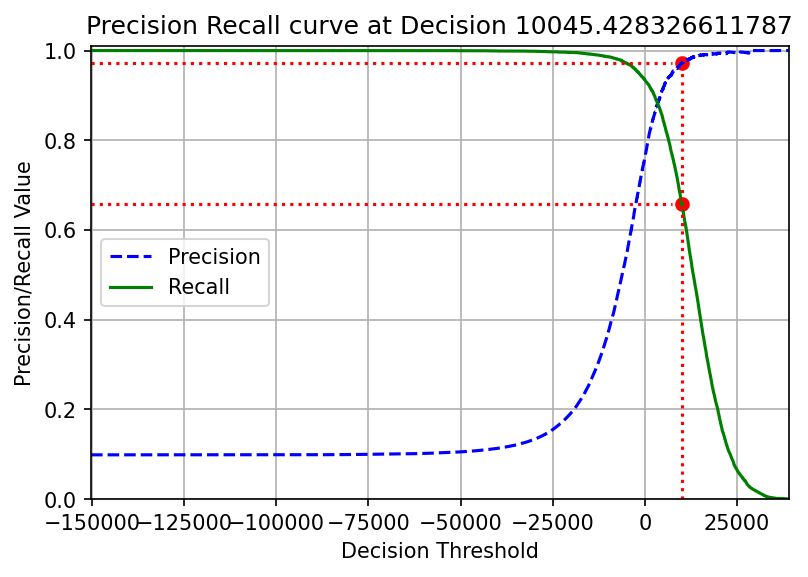

In [36]:
plot_precision_recall_vs_threshold(precisions, recalls,thresholds, 56000)

## MultiClass Classification
---

Now, run the classifier on the entire data of y rather than running it with a specific number 

In [37]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_tr, y_tr)

SVC()

In [ ]:
## model 2
from sklearn.linear_model import SGDClassifier

svcModel =  SGDClassifier(random_state=42)
svcModel.fit(X_tr, y_tr)

#### Compute Cross validation score for performance of the model

In [40]:
from sklearn.model_selection import cross_val_score

svc = cross_val_score(svm_clf, X_tr, y_tr, cv=3, scoring="accuracy")
print(svc)

[0.9763  0.97725 0.9758 ]


#### Compute the Confusion matrix for this problem

In [42]:
y_train_pred = cross_val_predict(svcModel, X_tr, y_train_4, cv=3)

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (2).

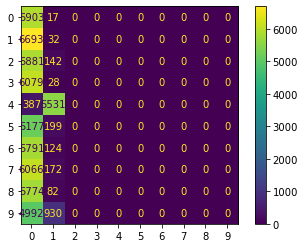

In [43]:
cm = confusion_matrix(y_tr, y_train_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not 4","4"])
disp.plot()

plt.show()

In [ ]:
np.fill_diagonal(cm, 0)

row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Error Confusion matrix for Multi Class Classification")
plt.colorbar()
plt.show()